<a href="https://colab.research.google.com/github/labasubagia/dashboard-ecommerce/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Ecommerce
- **Nama:** Kadek Laba Subagia
- **Email:** labasubagia22@gmail.com
- **ID Dicoding:** labasubagia22


## Menentukan Pertanyaan Bisnis

- Berapa banyak penjualan yang ada setiap bulannya?
- Manakah seller dengan performa penjualan terbaik dan terburuk?
- Manakah seller dengan rating terbaik dan terburuk?

## Import Semua Packages/Library yang Digunakan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [58]:
# download and extract data
!gdown 1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK -O dataset.zip
!unzip -o dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=0cb96707-01fe-4828-9832-0b4f2a183574
To: /content/dataset.zip
100% 44.9M/44.9M [00:00<00:00, 113MB/s]
Archive:  dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


In [59]:
DIR = os.path.join('.', 'E-Commerce Public Dataset')

In [60]:
order_item_df = pd.read_csv(os.path.join(DIR, 'order_items_dataset.csv'))
order_item_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [61]:
order_review_df = pd.read_csv(os.path.join(DIR, 'order_reviews_dataset.csv'))
order_review_df.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [62]:
order_df = pd.read_csv(os.path.join(DIR, 'orders_dataset.csv'))
order_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- data order untuk menjawab penjualan per bulan & penjualan per seller
- data review untuk rating seller
- berdasarkan pertanyaan, orders_dataset, order_review_dataset, dan order_items_dataset sudah cukup

### Assessing Data

In [63]:
# check data type
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [64]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [65]:
# check is null
order_item_df.isna().count()

,0
order_id,112650
order_item_id,112650
product_id,112650
seller_id,112650
shipping_limit_date,112650
price,112650
freight_value,112650


In [66]:
order_item_df[order_item_df.isna()].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
order_item_df.duplicated().sum()

0

In [68]:
# check data type
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [69]:
# check null
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [70]:
order_review_df.duplicated().sum()

0

In [71]:
# check data type
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [72]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [73]:
# lihat data yang null
order_df[order_df.isna().any(axis=1)].head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [74]:
order_df.duplicated().sum()

0

**Insight:**
- tipe data pada order item shipping_limit_date perlu diubah ke date
- ada null yang perlu dihilangkan pada order item
- order review review_creation_date, review_answer_timestamp perlu diubah menjadi date
- order review null tidak perlu diubah karena comment tidak penting menjawab pertanyaan di atas
- data order memiliki beberapa field yang mesti diubah ke date yakni order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
- data order null tergantung dari order status

### Cleaning Data

In [75]:
# change datetime
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

# clean all NaN rows
order_item_df = order_item_df.dropna(axis=0)
order_item_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [76]:
order_review_df['review_creation_date'] = pd.to_datetime(order_review_df['review_creation_date'])
order_review_df['review_answer_timestamp'] = pd.to_datetime(order_review_df['review_answer_timestamp'])

order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [77]:
order_df['order_status'] = order_df['order_status'].astype('category')


date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
]
for column in date_columns:
    order_df[column] = pd.to_datetime(order_df[column])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


**Insight:**
- ubah tipe data
- clean row dengan NaN

## Exploratory Data Analysis (EDA)

### Explore ...

In [78]:
order_item_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [79]:
order_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [80]:
order_review_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [81]:
# buat 1 data
df = order_df[order_df['order_status'] == 'delivered']
df.head()

# total prince dari satu order
order_item_df['_total_order_value'] = order_item_df['price'] + order_item_df['freight_value']
order_value_by_id = order_item_df.groupby('order_id')['_total_order_value'].sum()

df['total_order_price'] = df['order_id'].map(order_value_by_id)

df = df.merge(order_item_df, on='order_id')
df = df.merge(order_review_df, on='order_id')
df.head()

df.to_csv('main_data.csv')

<ipython-input-81-f01271511929>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_order_price'] = df['order_id'].map(order_value_by_id)


**Insight:**
- karena pada satu order memungkinkan untuk membeli ke beberapa seller sekaligus, coba cari apakah bisa menilai per seller, ternyata tidak, jadi cara yang bisa digunakkan adalah dengan sharing rating yang sama ke beberapa seller
-

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak penjualan yang ada setiap bulannya?

In [82]:
# montly data
monthly_orders_df = df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "total_order_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_order_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

<ipython-input-82-ef614c5bbc02>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = df.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count,revenue
0,2016-09,1,430.38
1,2016-10,262,60238.68
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,708,170179.98


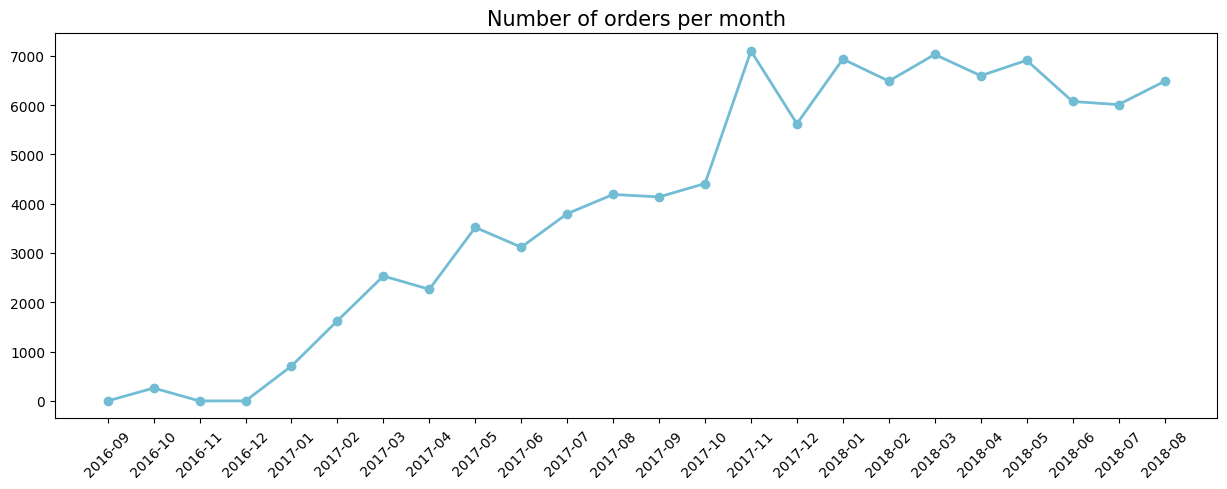

In [83]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_orders_df.order_approved_at, monthly_orders_df.order_count, marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of orders per month", loc='center', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Manakah seller dengan performa penjualan terbaik dan terburuk?

```
# This is formatted as code
```



In [88]:
order_per_seller_df = df.groupby('seller_id').agg({
    'price': 'sum',
    'order_id': 'nunique',
})
order_per_seller_df = order_per_seller_df.rename(columns={
    'price': 'revenue',
    'order_id': 'order_count',
}).sort_values(by=['revenue', 'order_count'], ascending=False)

order_per_seller_df

,revenue,order_count
seller_id,,
4869f7a5dfa277a7dca6462dcf3b52b2,225586.34,1116
53243585a1d6dc2643021fd1853d8905,215904.44,346
4a3ca9315b744ce9f8e9374361493884,197225.32,1753
fa1c13f2614d7b5c4749cbc52fecda94,189649.54,574
7c67e1448b00f6e969d365cea6b010ab,186664.01,967
...,...,...
4965a7002cca77301c82d3f91b82e1a9,8.49,1
ad14615bdd492b01b0d97922e87cb87f,8.25,1
702835e4b785b67a084280efca355756,7.60,1


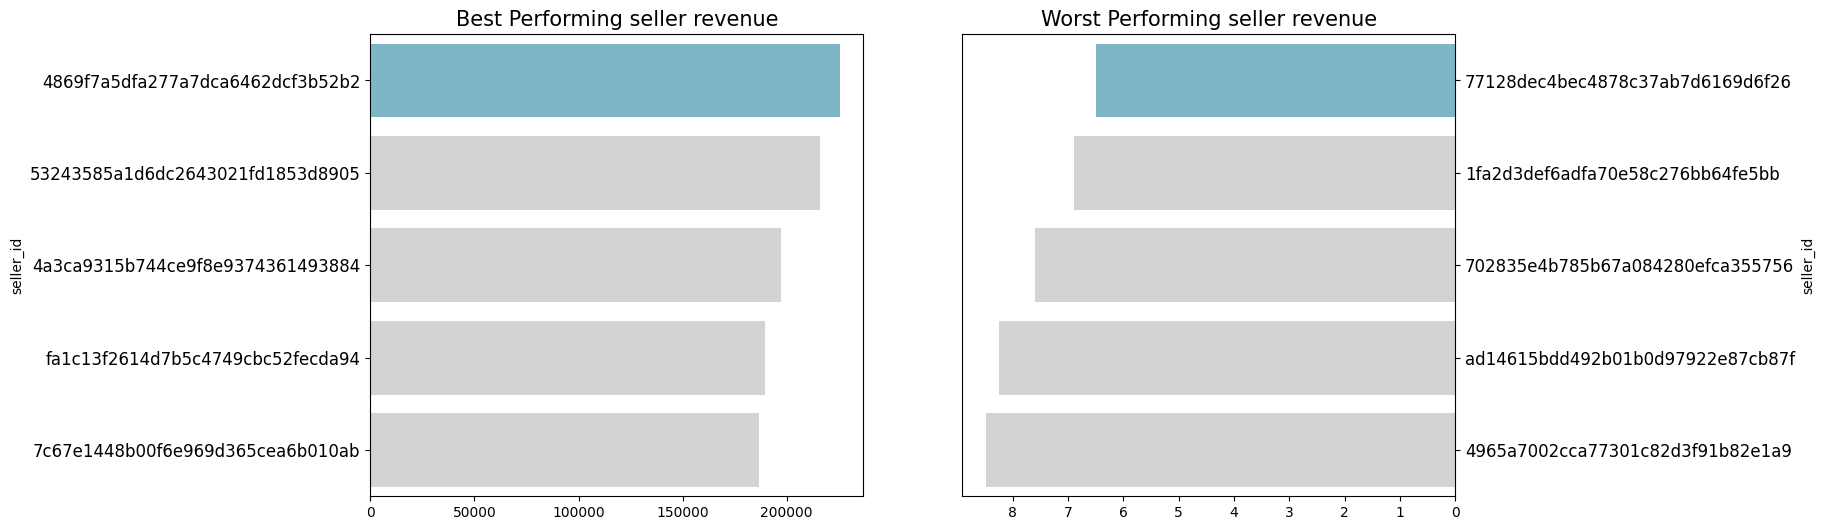

In [85]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='revenue', y='seller_id', hue='seller_id', data=order_per_seller_df.head(5), palette=colors, ax=ax[0])
# ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing seller revenue", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='revenue', y='seller_id', hue='seller_id', data=order_per_seller_df.sort_values(by='revenue', ascending=True).head(5), palette=colors, ax=ax[1])
# ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing seller revenue", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

### Pertanyaan 3: Manakah seller dengan rating terbaik dan terburuk?





In [86]:
order_seller_review_df = df.groupby('seller_id').agg({
    'review_score': 'mean',
    'order_id': 'nunique',
    'price': 'sum',
}).sort_values(by=['review_score', 'price', 'order_id'], ascending=False)

order_seller_review_df.rename(columns={
    'review_score': 'rating',
    'order_id': 'order_count',
    'prince': 'revenue',
}, inplace=True)


order_seller_review_df

,rating,order_count,price
seller_id,,,
e3b4998c7a498169dc7bce44e6bb6277,5.0,1,6735.0
ee27a8f15b1dded4d213a468ba4eb391,5.0,1,6499.0
a63bfbaa882c8f4542891b4e2246cc7f,5.0,6,5682.0
ff4ea69c2a729e83e63c7579e4ef8170,5.0,7,5469.0
2addf05f476d0637864454e93ba673d5,5.0,12,4552.0
...,...,...,...
6614814a00d344b846ae209f95ee7e3f,1.0,1,13.0
c1d1ebb4745cc43cb6f05e9c8a705c9a,1.0,1,12.5
c1dde11f12d05c478f5de2d7319ad3b2,1.0,1,12.5


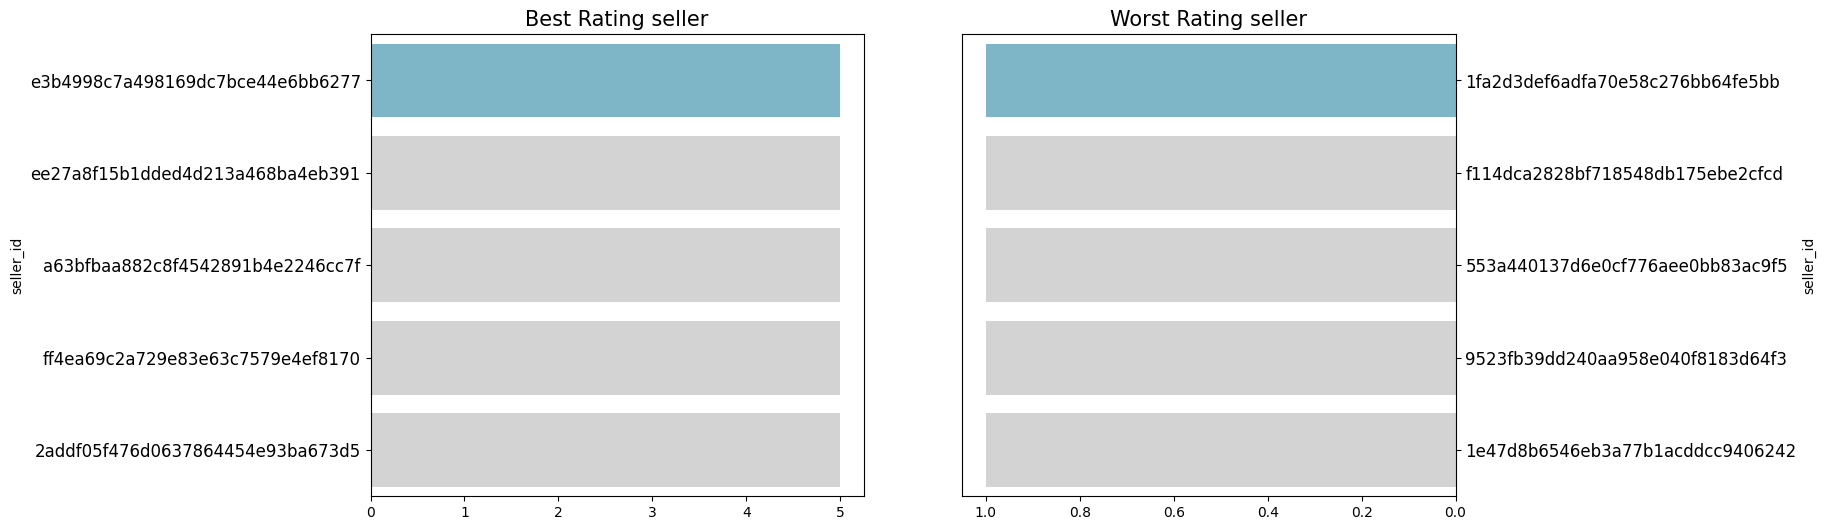

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='rating', y='seller_id', hue='seller_id', data=order_seller_review_df.head(5), palette=colors, ax=ax[0])
# ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Rating seller", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='rating', y='seller_id', hue='seller_id', data=order_seller_review_df.sort_values(by='rating', ascending=True).head(5), palette=colors, ax=ax[1])

# ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Rating seller", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

**Insight:**
- penjualan dalam jangka panjang mengalami kenaikan

## Analisis Lanjutan (Opsional)

In [89]:
# rfm
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
max_date = df['order_approved_at'].max()
df['recency'] = (max_date - df['order_approved_at']).dt.days


frequency = df.groupby('customer_id')['order_id'].count().reset_index(name='frequency')
monetary_value = df.groupby('customer_id')['total_order_price'].sum().reset_index(name='monetary')

rfm_df = pd.merge(frequency, monetary_value, on='customer_id')

rfm_df = pd.merge(rfm_df, df[['customer_id','recency']], on='customer_id').sort_values(by='recency', ascending=True)
# rfm_df['recency'] = rfm_df['recency']+1

rfm_df.drop_duplicates(inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
47636,6eff0b0388f0e0829bd659d12e168828,1,128.99,0.0
29404,448945bc713d98b6726e82eda6249b9e,5,2486.25,0.0
63168,930ae890c223dddbd81d9870d9701ec7,2,371.64,0.0
105804,f5fc6bc27d5c599cc9bed0a2eacf030e,1,111.62,0.0
31707,49a6ae8a95c6a78d90945b983ab1ecfc,4,557.68,0.0


<ipython-input-90-2cb74bd47ac7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-90-2cb74bd47ac7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-90-2cb74bd47ac7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="

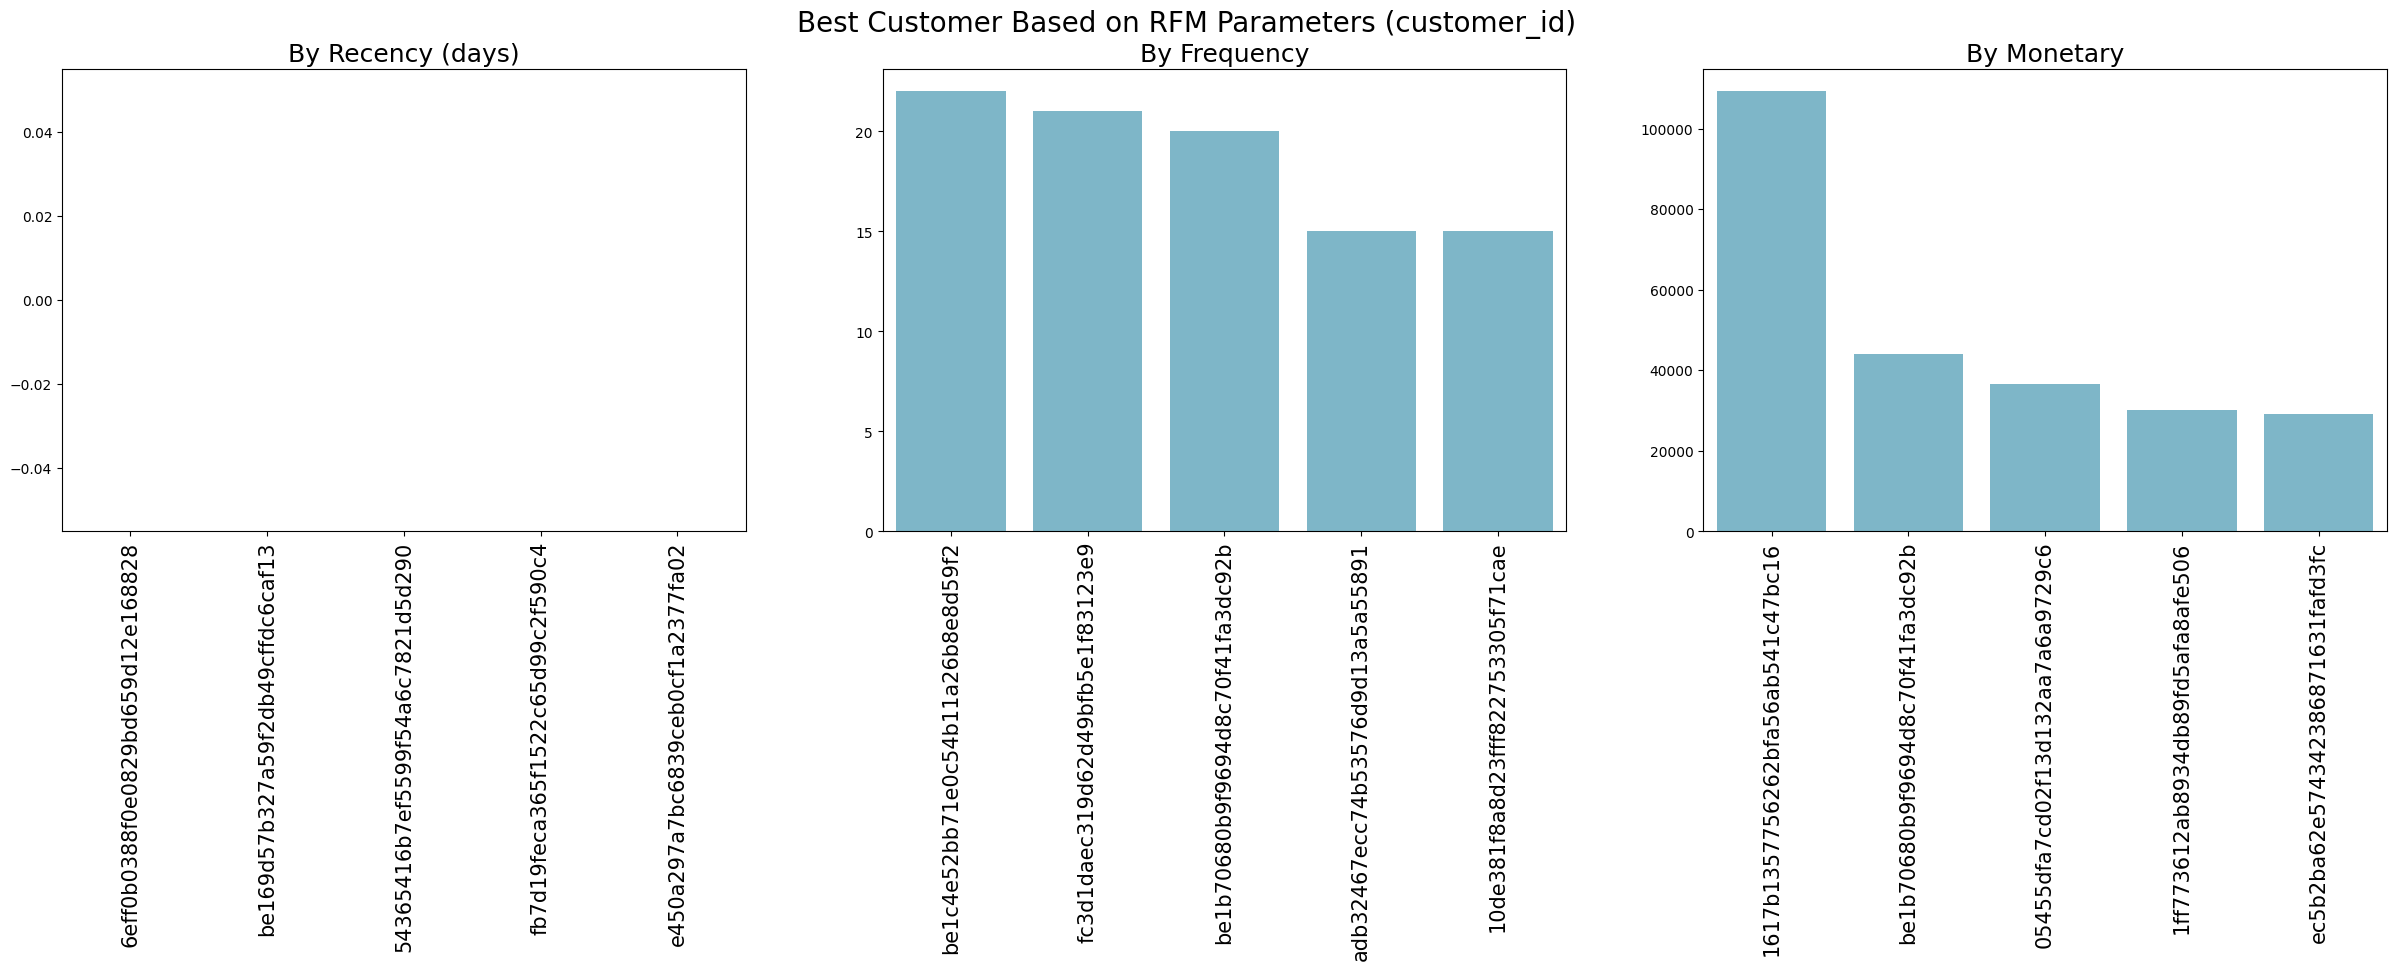

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
rot = 90

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=rot)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=rot)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=rot)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1: dapat dilihat pada grafik
- Conclution pertanyaan 2: terbaik: 4869f7a5dfa277a7dca6462dcf3b52b2, terburuk: 77128dec4bec4878c37ab7d6169d6f26
- Conclution pertantaan 3: terbaik: e3b4998c7a498169dc7bce44e6bb6277, terburuk: 1fa2d3def6adfa70e58c276bb64fe5bb